<h1 id="Contents">Contents<a href="#Contents"></a></h1>
        <ol>
        <li><a class="" href="#Imports">Imports</a></li>
<li><a class="" href="#Single-Particle-Motions">Single-Particle Motions</a></li>
<ol><li><a class="" href="#Making-Some-Functions">Making Some Functions</a></li>
<li><a class="" href="#Uniform-B-and-Uniform-(or-time-varying)-E">Uniform B and Uniform (or time varying) E</a></li>
<ol><li><a class="" href="#E=0">E=0</a></li>
<ol><li><a class="" href="#Solving-Numerically">Solving Numerically</a></li>
<li><a class="" href="#Using-the-Analytical-Solution">Using the Analytical Solution</a></li>
<li><a class="" href="#Animate-the-Trajectory">Animate the Trajectory</a></li>
</ol><li><a class="" href="#Finite-Constant-E">Finite Constant E</a></li>
<li><a class="" href="#Finite-Time-Varying-E">Finite Time Varying E</a></li>
<li><a class="" href="#Finite-Spatial-Varying-E">Finite Spatial Varying E</a></li>
</ol><li><a class="" href="#A-Generalized-Implementation">A Generalized Implementation</a></li>
<ol><li><a class="" href="#The-Generalization">The Generalization</a></li>
<li><a class="" href="#Using-the-Generalized-Equations">Using the Generalized Equations</a></li>
<ol><li><a class="" href="#Constant-B-and-E-=-0">Constant B and E = 0</a></li>
<li><a class="" href="#B-=-0-and-E-depending-on-position">B = 0 and E depending on position</a></li>
</ol>

# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import plotly
import plotly.express as px
from matplotlib import animation
from IPython.display import clear_output
# from life_saving_tools.maths.ode import ODE
from ode import ODE
from IPython.display import Video, HTML
plt.rcdefaults()
o = ODE()
plotly.offline.init_notebook_mode()

# Single-Particle Motions

## Making Some Functions

Here, I'll define some functions that will be used in the following sections. 

In [3]:
def solve_ode(fns, ts, ics, modify=False):
    """
    A function to solve an ODE using the `ODE` class's `solve` method.

    Parameters
    ----------
    fns : list
        A list of functions that represent the ODE's differential equations.
    ts : list
        A list of times at which the ODE will be solved.
    ics : tuple
        A tuple of initial conditions for the ODE.
    modify : bool, optional
        A boolean that determines whether the ODE will be solved with the
        modification of the initial conditions. The default is `False`.

    Returns
    -------
    np.array:
        A numpy array of the solutions to the ODE.
    """
    t0, x0 = ics
    o = ODE()
    xs = np.zeros((len(ts), len(fns)))
    for i in range(len(ts)):
        if modify:
            if i<=10:
                xs[i] = o.solve(funcs = fns, x0 = t0, y0=x0, x=ts[i])
            else:
                xs[i] = o.solve(funcs = fns, x0 = np.array([ts[i-5]]*len(fns)), y0=xs[i-5], x=ts[i])
        else:
            xs[i] = o.solve(funcs = fns, x0 = t0, y0=x0, x=ts[i])
    return xs

In [7]:
def show_results(xs, ts, title="", xlabel="Time", ylabel="Values", **kwargs):
    """
    Plots all the columns of xs with time

    Parameters
    ----------
    xs : np.array
        A numpy array of the solutions to the ODE.
    ts : np.array
        A numpy array of the times at which the ODE was solved.
    title : str
        The title of the plot.
    xlabel : str
        The label for the x-axis.
    ylabel : str
        The label for the y-axis.
    **kwargs : dict
        A dictionary of keyword arguments to be passed to the `plt.plot`.

    Returns
    -------
    None
    """
    plt.figure(figsize=(10,6))
    for i in range(len(xs[0, :])):
        plt.plot(ts, xs[:, i], label=f"$u_{i+1}$", **kwargs)
    plt.xlim(0, ts[-1])
    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [8]:
def plot_x_with_y(xs, t=None, title="", **kwargs):
    """
    Plots x with y using plotly.

    Parameters
    ----------
    xs : np.array
        A numpy array of the solutions to the ODE.
    title : str
        The title of the plot.
    **kwargs : dict
        A dictionary of keyword arguments to be passed to the `plotly.express.line`.

    Returns
    -------
    None
    """
    color = t if t is not None else np.random.rand(3)
    fig = px.scatter(
        x=xs[:, 0],
        y=xs[:, 1],
        color=color,
    )
    fig.update_layout(
        title=title,
        xaxis_title="x",
        yaxis_title="y",
        width=600,
        height=600,
        **kwargs
    )
    fig.show()


In [9]:
def plot_x_with_y_and_z(xs, zs, title="", **kwargs):
    """
    Plots x with y and z using plotly.

    Parameters
    ----------
    xs : np.array
        A numpy array of the solutions to the ODE.
    zs : np.array
        A numpy array of the solutions to the ODE containg the z-coordinate.
    title : str
        The title of the plot.
    **kwargs : dict
        A dictionary of keyword arguments to be passed to the `plotly.express.line`.
    
    Returns
    -------
    None
    """
    fig = px.line_3d(x=xs[:, 0], y=xs[:, 1], z=zs)
    fig.update_layout(
        title=title,
        xaxis_title="x",
        yaxis_title="y",
        width=600,
        height=600,
        **kwargs
    )
    fig.show()

In [10]:
def animate_trajectory(
    xs, t, title="", num_points_per_time_period=100, interval=20, fps=30, **kwargs
):
    """
    Animates the trajectory of the particle using matplotlib.

    Parameters
    ----------
    xs : np.array
        A numpy array of the solutions to the ODE.
    t : np.array
        A numpy array of the times at which the ODE was solved.
    title : str
        The title of the plot.
    num_points_per_time_period : int
        The number of points to be plotted per time period. default is 100.
    **kwargs : dict
        A dictionary of keyword arguments to be passed to the `plt.figure`.
    """
    fig = plt.figure(figsize=(8, 8), **kwargs)
    # Setting axes limits
    margin = 0.2
    xlims = [xs[:, 0].min() - margin, xs[:, 0].max() + margin]
    ylims = [xs[:, 1].min() - margin, xs[:, 1].max() + margin]
    axis = plt.axes(xlim=xlims, ylim=ylims)
    # Setting labels for the axes
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)

    (line,) = axis.plot([], [], lw=2)

    def get_position(i):
        return xs[i, 0], xs[i, 1]

    # initializing the x and y data holders
    def init():
        line.set_data([], [])
        return (line,)

    # initializing empty values for x and y
    xdata, ydata = [], []
    legend = plt.legend()

    # animation function
    def animate(i):
        if (i + 1) % 50 == 0:
            clear_output(wait=True)
            print(f"TimeStamp: {i+1} of {len(t)}.")
        x, y = get_position(i)
        # appending values to the previously initialized x and y data holders
        xdata.append(x)
        ydata.append(y)
        line.set_label("t = " + str(round(t[i], 2)))
        # Changing the line color
        colors = ["r", "g", "b", "m", "k"]
        j = i // num_points_per_time_period
        j = j % len(colors)
        line.set_color(colors[j])

        legend = plt.legend(loc="upper right")
        line.set_data(xdata, ydata)

        return line, legend

    # calling the animation function
    anim = animation.FuncAnimation(
        fig, animate, init_func=init, frames=len(t), interval=interval, blit=True
    )

    # saves the animation
    file_name = title.replace(" ", "_") + ".mp4"
    anim.save(file_name, writer="ffmpeg", fps=fps)
    return file_name


## Uniform B and Uniform (or time varying) E

### E=0

#### Solving Numerically

Define the following variables:
$$
\begin{align*}
x &= u_1\\
y &= u_2\\
\dot{x} &= u_3\\
\dot{y} &= u_4\\
\end{align*}
$$
Using this notation, we can write the equation of motion for the particle:
$$
\begin{align*}
\dot{u_1} &= u_3\\
\dot{u_2} &= u_4\\
\dot{u_3} &= c u_4\\
\dot{u_4} &= -c u_3\\
\end{align*}
$$
Here c is a constant which is equal to $\frac{qB}{m}$.

The z component of the particle's velocity is a constant. That is, for z component, we have:
$$
z = v_zt+z_0
$$

We can solve the system of above equation as following.

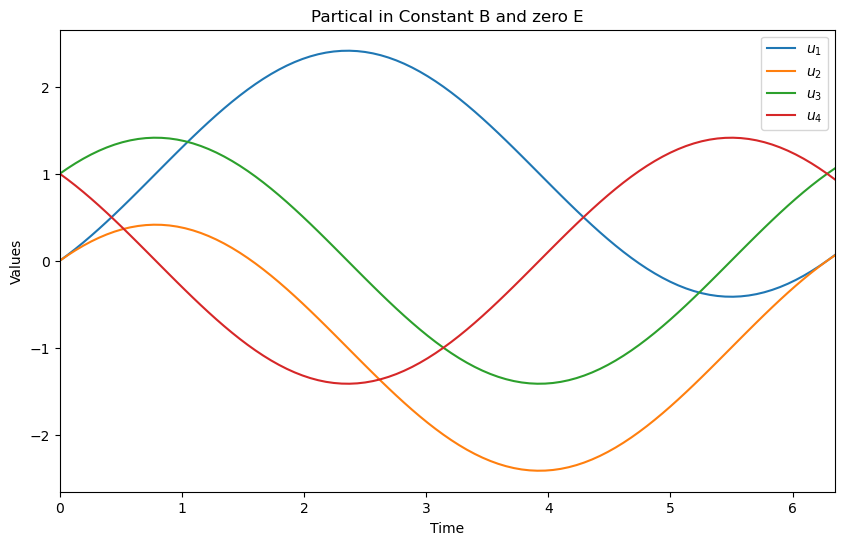

In [11]:
#Defining the constants
c = 1
vz = 1
z0=0

#Defining the function to be solved
f1 = lambda t, u1, u2, u3, u4: u3
f2 = lambda t, u1, u2, u3, u4: u4
f3 = lambda t, u1, u2, u3, u4: c*u4
f4 = lambda t, u1, u2, u3, u4: -c*u3
funcs = [f1, f2, f3, f4]

#The time period
T = 2*np.pi/c
# Number of time periods to plot
NUM_TIME = 1
num_points_per_time_period = 100
T_last = NUM_TIME*T + T*0.01
t = np.linspace(0, T_last, NUM_TIME*num_points_per_time_period) #Plotting till `NUM_TIME` period

# Initial conditions
t0 = np.array([0, 0, 0, 0])
x0 = np.array([0, 0, 1, 1])

# Solving the ODE for x and y
xs = solve_ode(funcs, t, (t0, x0), modify=False)
# Getting z
zs = vz*t + z0

# Plotting the Results
title="Partical in Constant B and zero E"
show_results(xs, t, title)

Here is a plot showing the motion of the particle in the x-y plane.

In [12]:
#Plotting x with y
plot_x_with_y(xs,t, title)

And here is a 3d plot.

In [13]:
#Plotting x with y and z
plot_x_with_y_and_z(xs, zs, title)

#### Using the Analytical Solution

The analytical solution is:
$$
\begin{align*}
x &= x_0+r_l\cos(\omega_c t)\\
y &= y_0+r_l\sin(\omega_c t)\\
z &= z_0+vt
\end{align*}
$$
where:
$$
\begin{align*}
r_l &= \frac{mv}{qB}\\
\omega_c &= \frac{qB}{m}
\end{align*}
$$

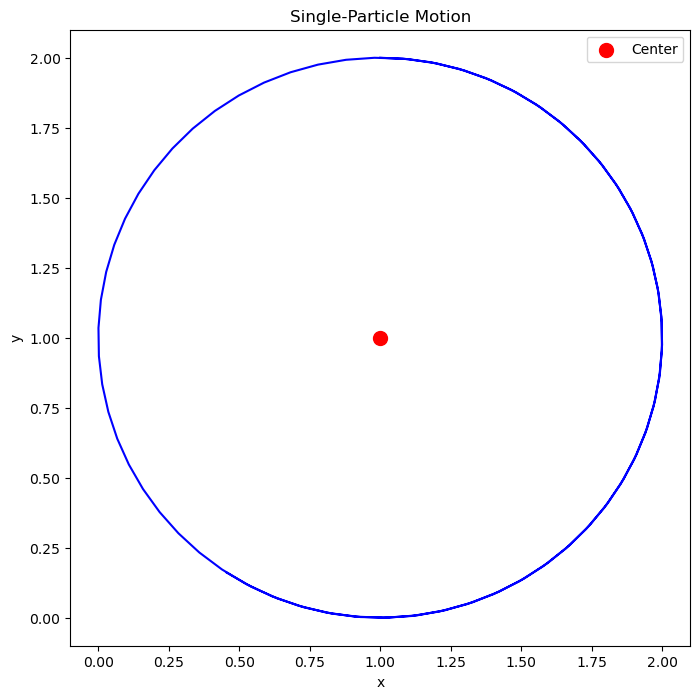

In [10]:
x0 = 1
y0 = 1
ts = np.linspace(0, 10, 100)
m = 1
v=1
q=1
B=1
rl = (m*v)/(q*B)
omega = (q*B/m)

xs_a = x0 + rl*np.sin(omega*ts)
ys_a = y0 + rl*np.cos(omega*ts)

plt.figure(figsize=(8, 8))
plt.plot(xs_a, ys_a, 'b-')
plt.scatter(x0, y0, c='r', s=100, label="Center")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Single-Particle Motion')
plt.legend()
plt.show()

#### Animate the Trajectory

An animation for one time period.

In [ ]:
file = animate_trajectory(xs, t, title=title, fps=10)

In [12]:
Video(file)

<!-- <video width="600" height="600" controls>
  <source src="particle_in_zero_E_for_one_T.mp4" type="video/mp4">
</video> -->

5 Time Periods

In [ ]:
#The time period
T = 2*np.pi/c
# Number of time periods to plot
NUM_TIME = 5
num_points_per_time_period = 100
T_last = NUM_TIME*T + T*0.01
t = np.linspace(0, T_last, NUM_TIME*num_points_per_time_period) #Plotting till `NUM_TIME` period

# Initial conditions
t0 = np.array([0, 0, 0, 0])
x0 = np.array([0, 0, 1, 1])

# Solving the ODE for x and y
xs = solve_ode(funcs, t, (t0, x0), modify=False)
title = "Partical in Constant B and zero E for 5 T"
file = animate_trajectory(xs, t, title=title)

In [14]:
Video(file)

Simulating for 5 time periods with modified initial conditions.

In [ ]:
#The time period
T = 2*np.pi/c
# Number of time periods to plot
NUM_TIME = 5
num_points_per_time_period = 100
T_last = NUM_TIME*T + T*0.01
t = np.linspace(0, T_last, NUM_TIME*num_points_per_time_period) #Plotting till `NUM_TIME` period

# Initial conditions
t0 = np.array([0, 0, 0, 0])
x0 = np.array([0, 0, 1, 1])

# Solving the ODE for x and y
xs = solve_ode(funcs, t, (t0, x0), modify=True)
title = "Partical in Constant B and zero E for 5 T modified"
file = animate_trajectory(xs, t, title=title)

In [16]:
Video(file)

### Finite Constant E

#### Solving Numerically

In case of finite E, we get the following equation of motion:
$$
\begin{align*}
\dot{v_x} &= \frac{qE_x}{m}+w_c v_y\\
\dot{v_y} &= -w_c v_x\\
v_z &= \frac{qE_z}{m}t + v_{z_0}
\end{align*}
$$

The solution to the transverse part can be determined by defining the following variables:
$$
\begin{align*}
x &= u_1\\
y &= u_2\\
\dot{x} &= u_3\\
\dot{y} &= u_4\\
\end{align*}
$$
Using this, the equation of motion for the particle in the x-y plane is:
$$
\begin{align*}
\dot{u_1} &= u_3\\
\dot{u_2} &= u_4\\
\dot{u_3} &= \frac{qE_x}{m}+ \omega_c u_4\\
\dot{u_4} &= -\omega_c u_3\\
\end{align*}
$$
Let's solve this.

In [17]:
def Ex(t):
    #Using a constant value
    return 1

def Ez(t):
    #Using a constant value
    return 1

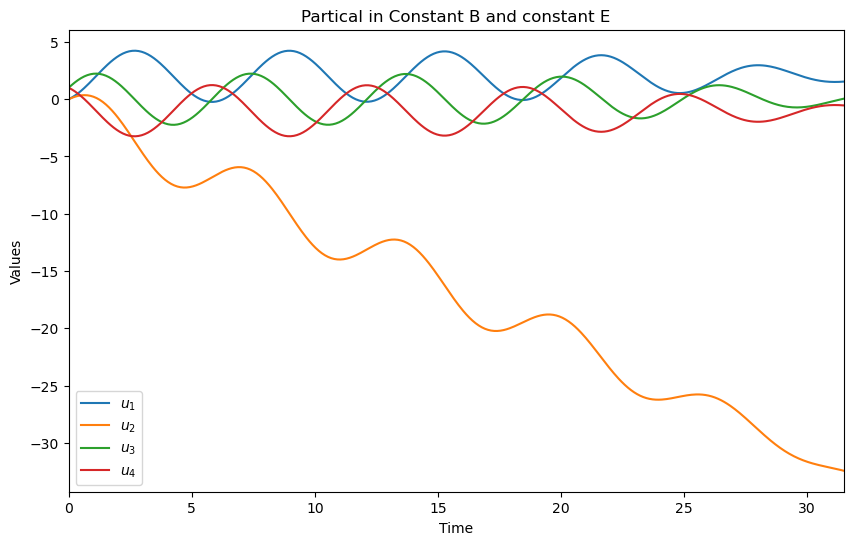

In [18]:
q, m, omega = 1, 1, 1
f1 = lambda t, u1, u2, u3, u4: u3
f2 = lambda t, u1, u2, u3, u4: u4
f3 = lambda t, u1, u2, u3, u4: q * Ex(t) / m + omega * u4
f4 = lambda t, u1, u2, u3, u4: -omega * u3
funcs = [f1, f2, f3, f4]
# The time period
T = 2 * np.pi / omega
# Number of time periods to plot
NUM_TIME = 5
T_last = NUM_TIME * T + T * 0.01
t = np.linspace(0, T_last, NUM_TIME * num_points_per_time_period)  # Plotting till one time period

# Initial conditions
t0 = np.array([0, 0, 0, 0])
x0 = np.array([0, 0, 1, 1])

# Solving the ODE for x and y
xs = solve_ode(funcs, t, (t0, x0), modify=False)

# Plotting the Results
title="Partical in Constant B and constant E"
show_results(xs, t, title)

In [19]:
plot_x_with_y(xs, t,title)

To make a 3d plot, let's solve for the z-coordinate too.


The equation of motion for the particle in the z axis is:$$v_z = \frac{qE_z}{m}t + v_{z_0}$$


To solve this, we define:
$$
\begin{align*}
z &= u_1\\
\dot{z} &= u_2\\
\end{align*}
$$
Using this, the equation of motion becomes:
$$
\begin{align*}
\dot{u_1} &= u_2\\
\dot{u_2} &= \frac{qE_z}{m}t + v_{z_0}
\end{align*}

Let's solve this:

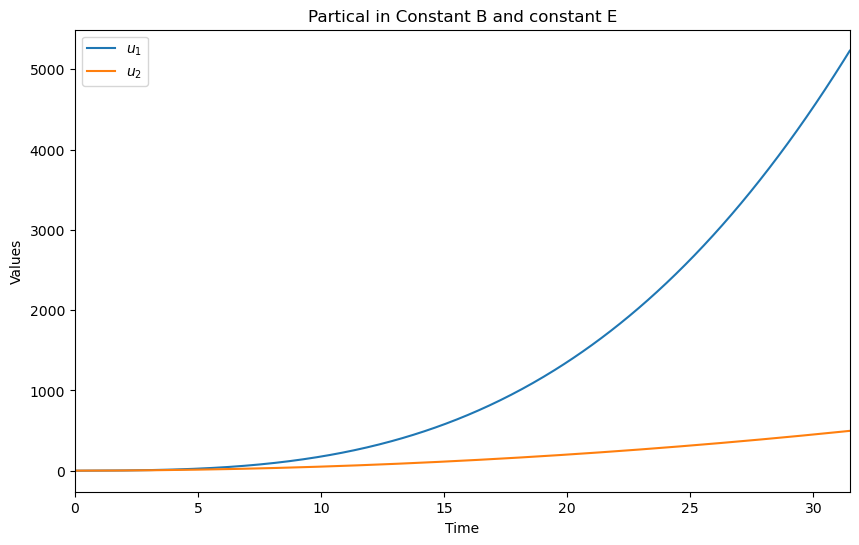

In [20]:
vz0 = 0
f1z = lambda t, u1, u2: u2
f2z = lambda t, u1, u2: q*Ez(t)*t/m + vz0
funcsz = [f1z, f2z]
#The time period
T = 2*np.pi/omega
# Number of time periods to plot
NUM_TIME = 5
T_last = NUM_TIME*T + T*0.01
t = np.linspace(0, T_last, NUM_TIME*num_points_per_time_period) #Plotting till NUM_TIME time period
t0 = np.array([0, 0])
x0 = np.array([0, 1])
zs = solve_ode(funcsz, t, (t0, x0), modify=False)
title = "Partical in Constant B and constant E"
show_results(zs, t, title)

In [21]:
plot_x_with_y_and_z(xs, zs[:, 0], title)

#### Animate the Trajectory

In [ ]:
title = "Partical in Constant B and constant E for 5 T"
file = animate_trajectory(xs, t, title=title)

In [23]:
Video(file)

In [ ]:
NUM_TIME = 5
T_last = NUM_TIME * T + T * 0.01
t = np.linspace(0, T_last, NUM_TIME * num_points_per_time_period)  # Plotting till one time period

# Initial conditions
t0 = np.array([0, 0, 0, 0])
x0 = np.array([0, 0, 1, 1])

# Solving the ODE for x and y
xs = solve_ode(funcs, t, (t0, x0), modify=True)

title = "Partical in Constant B and constant E for 5 T modified"
file = animate_trajectory(xs, t, title=title)

In [25]:
Video(file)

Let's reapeat the same simulation but with a varying E.

### Finite Time Varying E

We'll assume that the electric filed is varying sinusoidally with time in x direction and is zero otherwise. The equation of motion remains the same.

In [26]:
q, m, omega = 1, 1, 1
def Ex(t, omega=omega):
    #Using a constant value
    return np.sin(omega * t)

def Ez(t):
    #Using a constant value
    return 0

In [ ]:
NUM_TIME = 5
T_last = NUM_TIME * T + T * 0.01
t = np.linspace(0, T_last, NUM_TIME * num_points_per_time_period)  # Plotting till one time period

# Initial conditions
t0 = np.array([0, 0, 0, 0])
x0 = np.array([0, 0, 1, 1])

# Solving the ODE for x and y
xs = solve_ode(funcs, t, (t0, x0), modify=False)

title = "Partical in Constant B and time varying E for 5 T"
file = animate_trajectory(xs, t, title=title)

In [28]:
plot_x_with_y(xs, t, title)

In [29]:
Video(file)

In [30]:
zs = vz*t + z0
plot_x_with_y_and_z(xs, zs, title)

In [31]:
xs_modified = solve_ode(funcs, t, (t0, x0), modify=True)
plot_x_with_y_and_z(xs_modified, zs, title=title+" modified")

In [ ]:
file = animate_trajectory(xs_modified, t, title=title)

In [33]:
Video(file)

Let's reapeat the same simulation but with a E varying wit x.

### Finite Spatial Varying E

We'll assume that the electric filed is varying sinusoidally with time in x direction and is zero otherwise. The equation of motion remains the same.

In [34]:
q, m, omega = 1, 1, 1
def Ex(t, omega=omega):
    #Using a constant value
    return np.sin(omega * t)

def Ez(t):
    #Using a constant value
    return 0

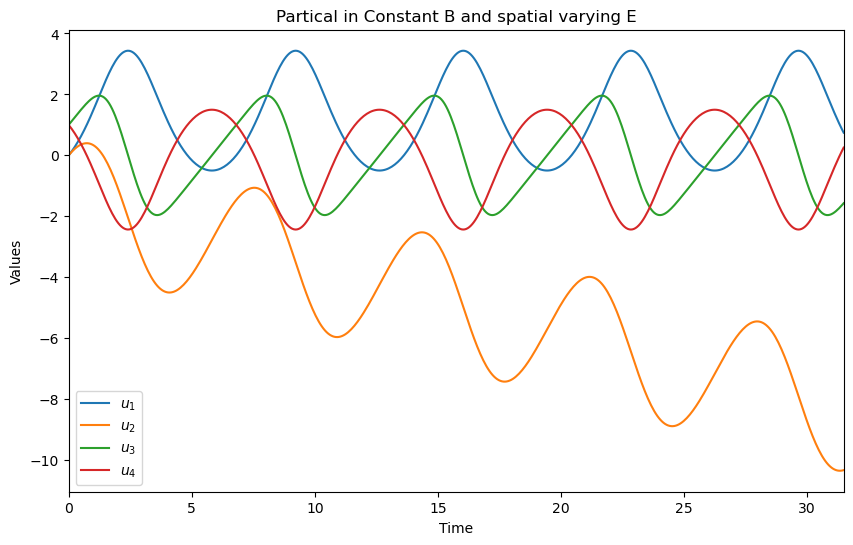

In [35]:
q, m, omega = 1, 1, 1
f1 = lambda t, u1, u2, u3, u4: u3
f2 = lambda t, u1, u2, u3, u4: u4
f3 = lambda t, u1, u2, u3, u4: q * Ex(u1) / m + omega * u4
f4 = lambda t, u1, u2, u3, u4: -omega * u3
funcs = [f1, f2, f3, f4]
# The time period
T = 2 * np.pi / omega
NUM_TIME = 5
T_last = NUM_TIME * T + T * 0.01
t = np.linspace(0, T_last, NUM_TIME * num_points_per_time_period)  # Plotting till one time period

# Initial conditions
t0 = np.array([0, 0, 0, 0])
x0 = np.array([0, 0, 1, 1])

# Solving the ODE for x and y
xs = solve_ode(funcs, t, (t0, x0), modify=True)

# Plotting the Results
title="Partical in Constant B and spatial varying E"
show_results(xs, t, title)

In [36]:
plot_x_with_y(xs, t, title)

The transverse component of the equation of motion also remains the same.

In [37]:
vz0 = 0
f1z = lambda t, u1, u2: u2
f2z = lambda t, u1, u2: q*Ez(t)*t/m + vz0
funcsz = [f1z, f2z]
#The time period
T = 2*np.pi/omega
# Number of time periods to plot
NUM_TIME = 5
T_last = NUM_TIME*T + T*0.01
t = np.linspace(0, T_last, NUM_TIME*num_points_per_time_period) #Plotting till NUM_TIME time period
t0 = np.array([0, 0])
x0 = np.array([0, 1])
zs = solve_ode(funcsz, t, (t0, x0), modify=False)
plot_x_with_y_and_z(xs, zs[:, 0], title)

In [ ]:
file = animate_trajectory(xs, t, title=title)

In [39]:
Video(file)

## A Generalized Implementation

### The Generalization

Here, we'll implement the equations of motion for a particle in a general electric and magnetic field. The equations of motion are:
$$
\begin{align*}
m\dot{v_x} &= v_yB_z-v_zB_y+qE_x\\
m\dot{v_y} &= v_zB_x-v_xB_z+qE_y\\
m\dot{v_z} &= v_xB_y-v_yB_x+qE_z\\
\end{align*}
$$

Same as before, we can define the variables:
$$
\begin{align*}
x &= u_1\\
y &= u_2\\
z &= u_3\\
\dot{x} &= u_4\\
\dot{y} &= u_5\\
\dot{z} &= u_6\\
\end{align*}
$$


Using these, the equations of motion are:
$$
\begin{align*}
\dot{u_1} &= u_4\\
\dot{u_2} &= u_5\\
\dot{u_3} &= u_6\\
\dot{u_4} &= \frac{qB_z}{m}u_5- \frac{B_yu_6}{m}+\frac{qE_x}{m}\\
\dot{u_5} &= \frac{qB_x}{m}u_6- \frac{B_zu_4}{m}+\frac{qE_y}{m}\\
\dot{u_6} &= \frac{qB_y}{m}u_4- \frac{B_xu_5}{m}+\frac{qE_z}{m}
\end{align*}
$$

Let's solve this.

In [15]:
#Defining E and B
Ex = lambda x, y, z, t: 0
Ey = lambda x, y, z, t: 0
Ez = lambda x, y, z, t: 0

Bx = lambda x, y, z, t: 0
By = lambda x, y, z, t: 0
Bz = lambda x, y, z, t: 1

#Defining the constants
q, m = 1, 1

In [16]:
#Defining the functions for the ODE
u1 = lambda t, u1, u2, u3, u4, u5, u6: u4
u2 = lambda t, u1, u2, u3, u4, u5, u6: u5
u3 = lambda t, u1, u2, u3, u4, u5, u6: u6
u4 = lambda t, u1, u2, u3, u4, u5, u6: (q * Bz(u1, u2, u3, t) / m) * u5 - (q * By(u1, u2, u3, t) / m) * u6 + (q * Ex(u1, u2, u3, t) / m)
u5 = lambda t, u1, u2, u3, u4, u5, u6: (q * Bx(u1, u2, u3, t) / m) * u6 - (q * Bz(u1, u2, u3, t) / m) * u4 + (q * Ey(u1, u2, u3, t) / m)
u6 = lambda t, u1, u2, u3, u4, u5, u6: (q * By(u1, u2, u3, t) / m) * u4 - (q * Bx(u1, u2, u3, t) / m) * u5 + (q * Ez(u1, u2, u3, t) / m)

functions = [u1, u2, u3, u4, u5, u6]

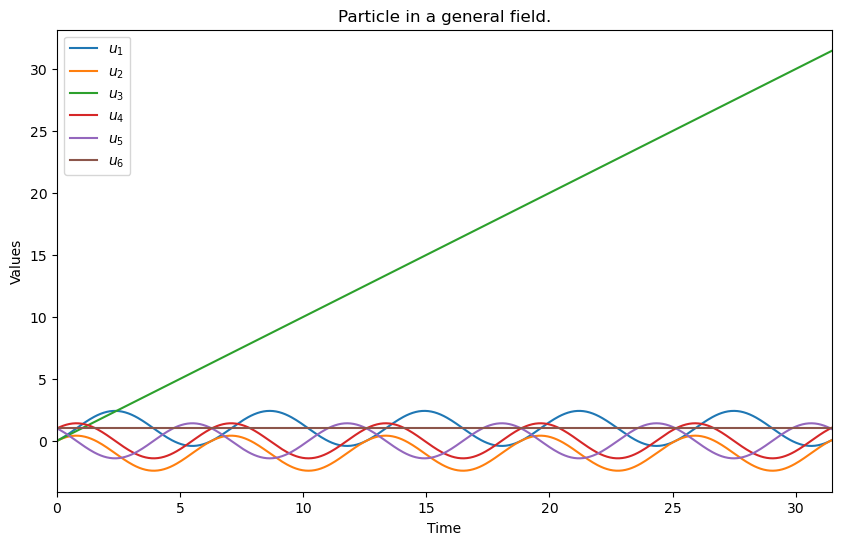

In [17]:
# The time period
omega = 1
T = 2 * np.pi / omega
# Number of time periods to plot
NUM_TIME = 5
T_last = NUM_TIME * T + T * 0.01
t = np.linspace(0, T_last, NUM_TIME * num_points_per_time_period)  # Plotting till NUM_TIME period

# Initial conditions
t0 = np.array([0, 0, 0, 0, 0, 0])
x0 = np.array([0, 0, 0, 1, 1, 1])

# Solving the ODE for x and y
xs = solve_ode(functions, t, (t0, x0), modify=True)

show_results(xs, t, "Particle in a general field.")

In [18]:
plot_x_with_y(xs, t, "Particle in a general field")

In [ ]:
plot_x_with_y_and_z(xs, xs[:, 2], "Particle in a general field")

In [19]:
t0 = np.array([0, 0, 0, 0, 0, 0])
x0 = np.array([0, 0, 0, 1, 1, 1])
ic = (t0, x0)
def general_fields(Es, Bs, time_periods=5, ic = ic, title="Particle in a general field", position=False, modify=True):
    Ex, Ey, Ez = Es
    Bx, By, Bz = Bs
    #Defining the constants
    q, m = 1, 1
    #Defining the functions for the ODE
    u1 = lambda t, u1, u2, u3, u4, u5, u6: u4
    u2 = lambda t, u1, u2, u3, u4, u5, u6: u5
    u3 = lambda t, u1, u2, u3, u4, u5, u6: u6
    u4 = lambda t, u1, u2, u3, u4, u5, u6: (q * Bz(u1, u2, u3, t) / m) * u5 - (q * By(u1, u2, u3, t) / m) * u6 + (q * Ex(u1, u2, u3, t) / m)
    u5 = lambda t, u1, u2, u3, u4, u5, u6: (q * Bx(u1, u2, u3, t) / m) * u6 - (q * Bz(u1, u2, u3, t) / m) * u4 + (q * Ey(u1, u2, u3, t) / m)
    u6 = lambda t, u1, u2, u3, u4, u5, u6: (q * By(u1, u2, u3, t) / m) * u4 - (q * Bx(u1, u2, u3, t) / m) * u5 + (q * Ez(u1, u2, u3, t) / m)

    functions = [u1, u2, u3, u4, u5, u6]

    # The time period
    omega = 1
    T = 2 * np.pi / omega
    # Number of time periods to plot
    NUM_TIME = time_periods
    T_last = NUM_TIME * T + T * 0.01
    t = np.linspace(0, T_last, NUM_TIME * num_points_per_time_period)  # Plotting till NUM_TIME period

    # Initial conditions
    t0, x0 = ic

    # Solving the ODE for x and y
    xs = solve_ode(functions, t, (t0, x0), modify=modify)

    #plot
    plot_x_with_y(xs, t, title)
    plot_x_with_y_and_z(xs, xs[:, 2], title)
    if position:
        show_results(xs, t, title)
    return xs, t

### Using the Generalized Equations

#### Constant B and E = 0

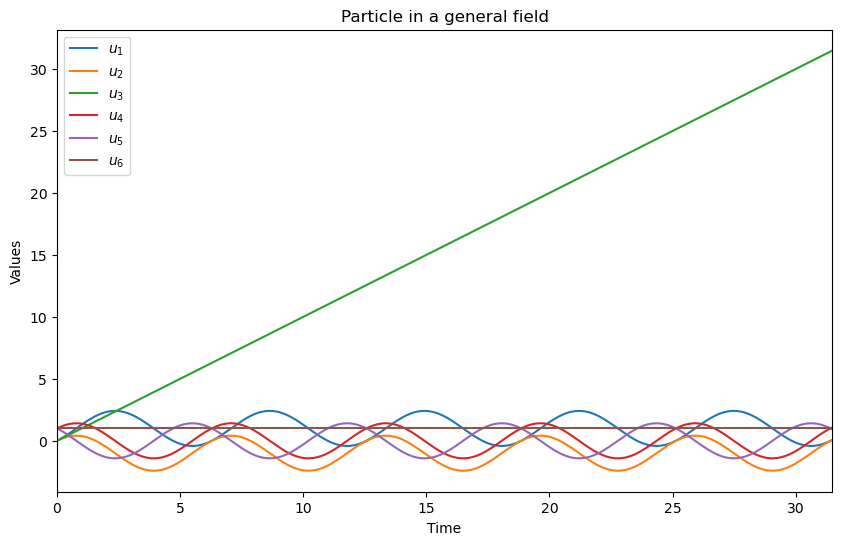

In [20]:
#Defining E and B
Ex = lambda x, y, z, t: 0
Ey = lambda x, y, z, t: 0
Ez = lambda x, y, z, t: 0

Bx = lambda x, y, z, t: 0
By = lambda x, y, z, t: 0
Bz = lambda x, y, z, t: 1

Es = [Ex, Ey, Ez]
Bs = [Bx, By, Bz]
xs, t = general_fields(Es, Bs, 5, title = "Particle in a general field", position=True)

#### B = 0 and E depending on position

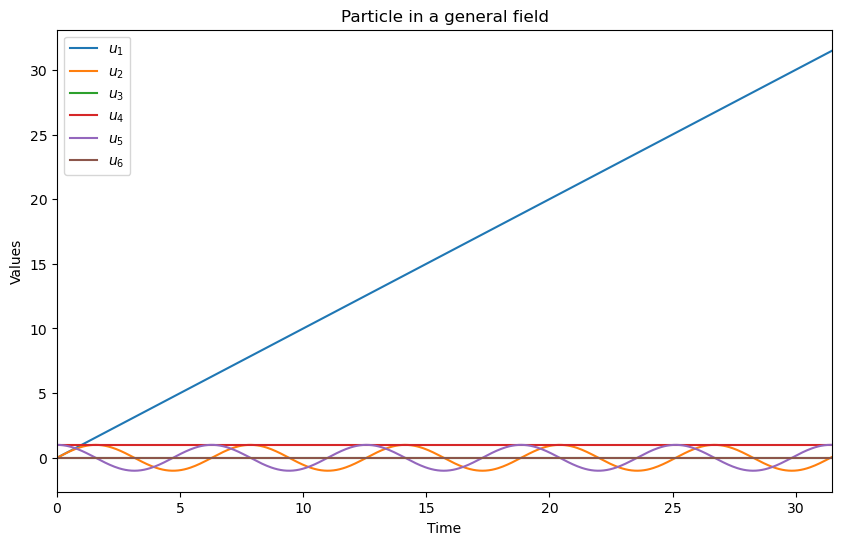

In [21]:
#Defining E and B
Ex = lambda x, y, z, t: 0
Ey = lambda x, y, z, t: -y
Ez = lambda x, y, z, t: 0

Bx = lambda x, y, z, t: 0
By = lambda x, y, z, t: 0
Bz = lambda x, y, z, t: 0

Es = [Ex, Ey, Ez]
Bs = [Bx, By, Bz]
t0 = np.array([0, 0, 0, 0, 0, 0])
x0 = np.array([0, 0, 0, 1, 1, 0])
ic = (t0, x0)
xs, t = general_fields(Es, Bs, 5,ic, "Particle in a general field", position=True)

In [124]:
px.scatter(x = xs[:, 4], y = xs[:, 1], height=600, width=600)

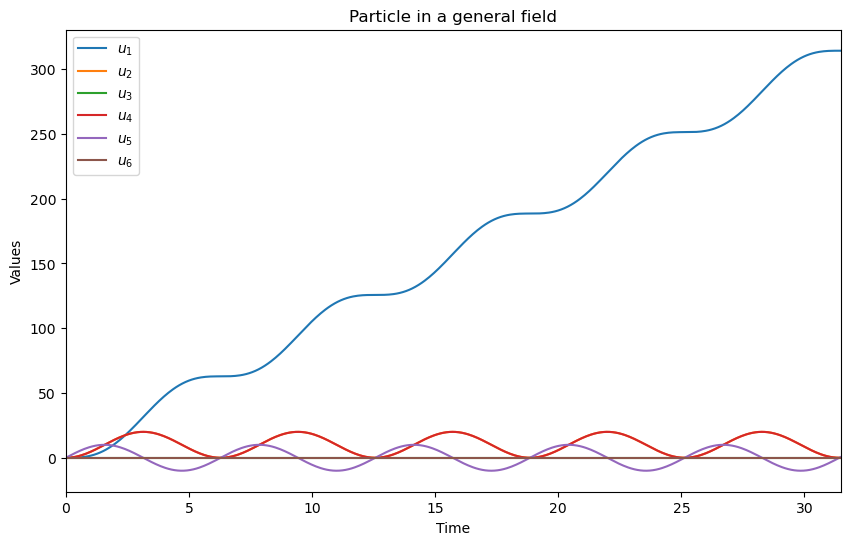

In [36]:
#Defining E and B
Ex = lambda x, y, z, t: 0
Ey = lambda x, y, z, t: 10
Ez = lambda x, y, z, t: 0

Bx = lambda x, y, z, t: 0
By = lambda x, y, z, t: 0
Bz = lambda x, y, z, t: 1

Es = [Ex, Ey, Ez]
Bs = [Bx, By, Bz]
t0 = np.array([0, 0, 0, 0, 0, 0])
x0 = np.array([0, 0, 0, 0, 0, 0])
ic = (t0, x0)
xs, t = general_fields(Es, Bs, 5,ic, "Particle in a general field", position=True)

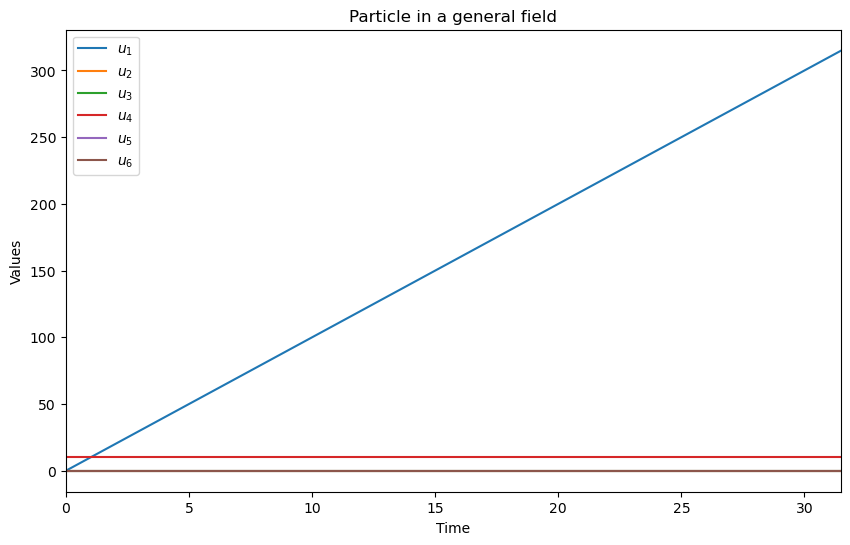

In [24]:
#Defining E and B
Ex = lambda x, y, z, t: 0
Ey = lambda x, y, z, t: 10
Ez = lambda x, y, z, t: 0

Bx = lambda x, y, z, t: 0
By = lambda x, y, z, t: 0
Bz = lambda x, y, z, t: 1

Es = [Ex, Ey, Ez]
Bs = [Bx, By, Bz]
t0 = np.array([0, 0, 0, 0, 0, 0])
x0 = np.array([0, 0, 0, 10, 0, 0])
ic = (t0, x0)
xs, t = general_fields(Es, Bs, 5,ic, "Particle in a general field", position=True)

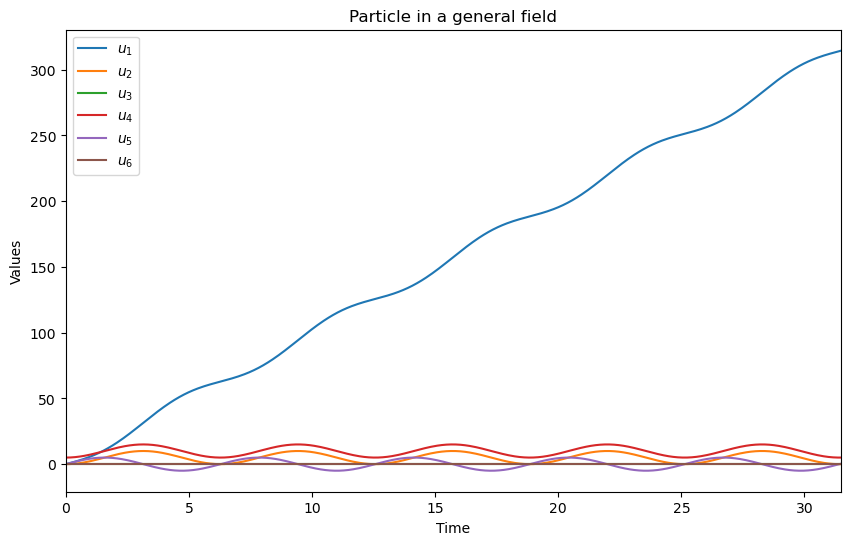

In [37]:
#Defining E and B
Ex = lambda x, y, z, t: 0
Ey = lambda x, y, z, t: 10
Ez = lambda x, y, z, t: 0

Bx = lambda x, y, z, t: 0
By = lambda x, y, z, t: 0
Bz = lambda x, y, z, t: 1

Es = [Ex, Ey, Ez]
Bs = [Bx, By, Bz]
t0 = np.array([0, 0, 0, 0, 0, 0])
x0 = np.array([0, 0, 0, 5, 0, 0])
ic = (t0, x0)
xs, t = general_fields(Es, Bs, 5,ic, "Particle in a general field", position=True)

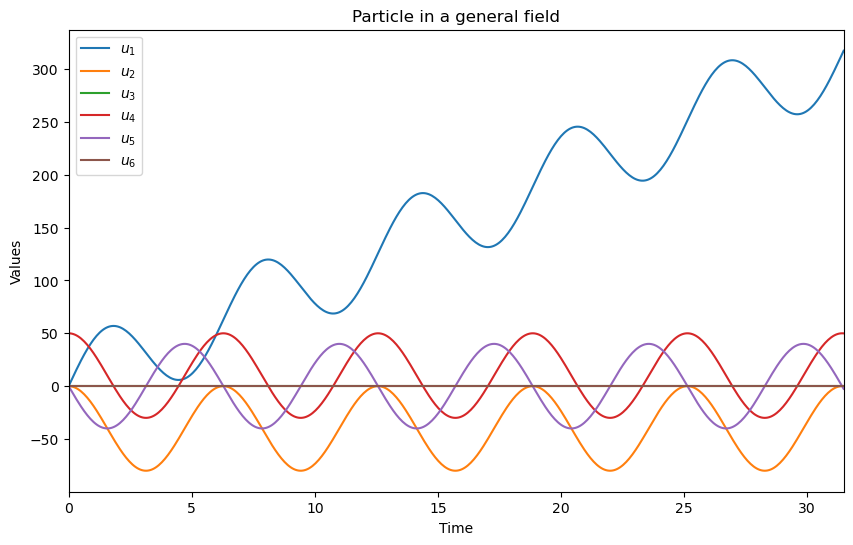

In [27]:
#Defining E and B
Ex = lambda x, y, z, t: 0
Ey = lambda x, y, z, t: 10
Ez = lambda x, y, z, t: 0

Bx = lambda x, y, z, t: 0
By = lambda x, y, z, t: 0
Bz = lambda x, y, z, t: 1

Es = [Ex, Ey, Ez]
Bs = [Bx, By, Bz]
t0 = np.array([0, 0, 0, 0, 0, 0])
x0 = np.array([0, 0, 0, 50, 0, 0])
ic = (t0, x0)
xs, t = general_fields(Es, Bs, 5,ic, "Particle in a general field", position=True)